<a href="https://colab.research.google.com/github/Nico-GP/Coding-Dojo_Track2/blob/main/Week5/Metricas_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODING DOJO**: Metricas de Regreasion
## Creado por: Nicolas Gonzalez
### Descripcion: Metricas de regresion lineal R2, MAE, MSE, RMSE
* Creado: 31/01/22
* Ultima Actualizacion: 31/01/22

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import pandas as pd
bh = pd.read_csv('/content/drive/My Drive/CodingDojo/Week5/modifiedBostonHousing.csv')
bh.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Se seleccionan las variables deseadas

In [23]:
bh = bh.loc[:, ['RM', 'LSTAT','PTRATIO', 'price']]
bh.head()

,RM,LSTAT,PTRATIO,price
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [25]:
bh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       506 non-null    float64
 1   LSTAT    506 non-null    float64
 2   PTRATIO  506 non-null    float64
 3   price    505 non-null    float64
dtypes: float64(4)
memory usage: 15.9 KB


In [26]:
bh.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
price      1
dtype: int64

Se eliminan las fials con valores faltantes

In [27]:
bh = bh.dropna(how = 'any')

In [28]:
bh.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
price      0
dtype: int64

Se observan datos anomalos

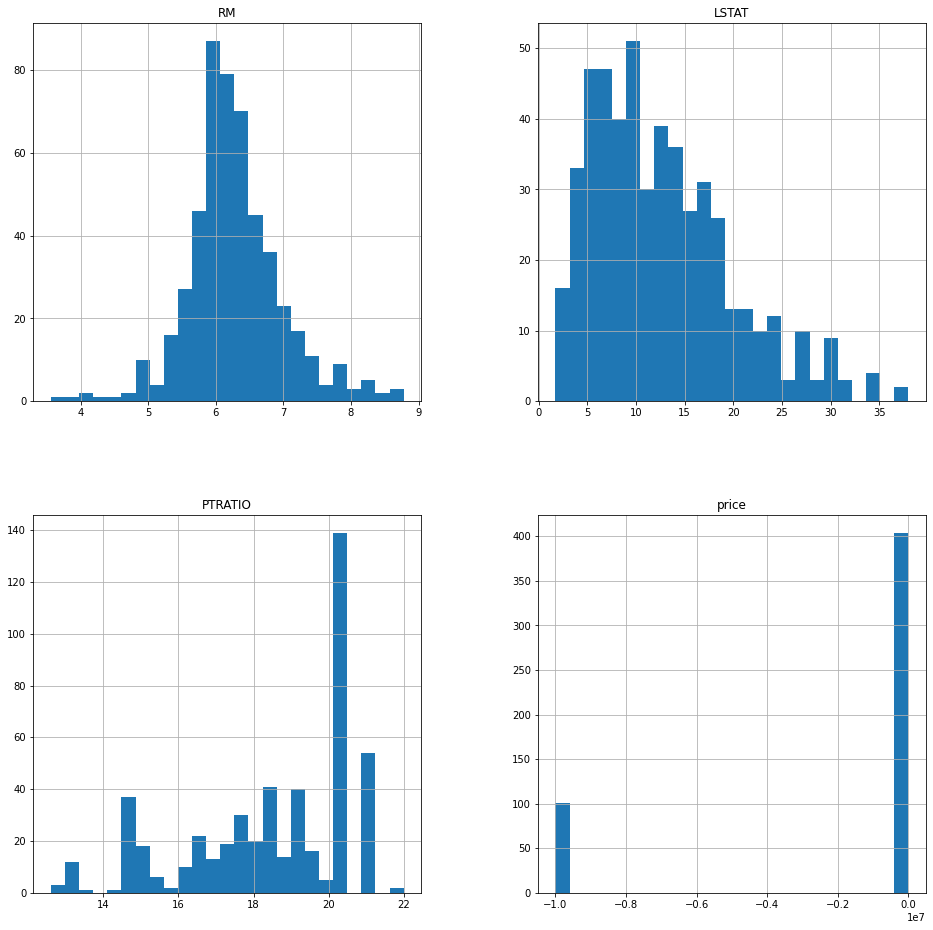

In [29]:
bh.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10');

Hay valores negativos en la columna "price"

Se eliminan los valores negativos de la columna "price"

In [30]:
precio_pos = bh.loc[:, 'price'] < 0 
bh = bh.loc[~precio_pos, :]

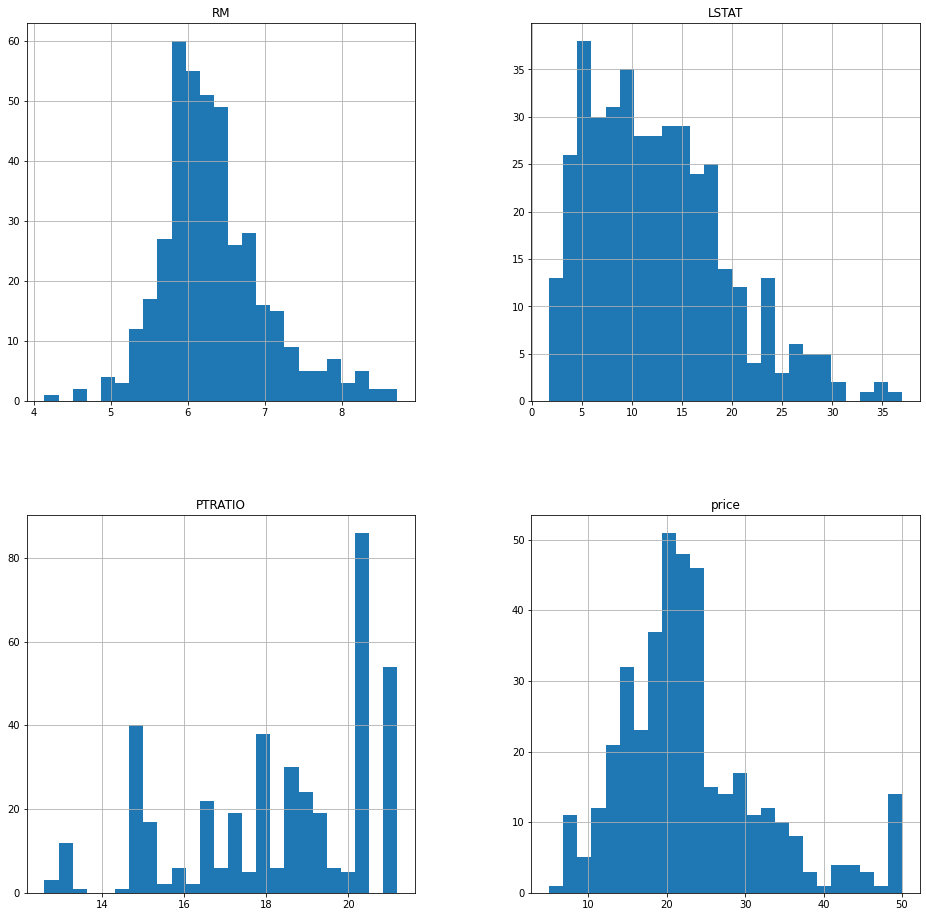

In [32]:
bh.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10');

Se crea matriz de caracteristicas

In [40]:
caract = ['RM',
            'LSTAT',
            'PTRATIO']
bh.loc[:, caract].head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [41]:
X = bh.loc[:, caract].to_numpy()

In [42]:
X.shape

(404, 3)

In [37]:
y = bh.loc[:, 'price'].values

Se crea vector objetivo

In [39]:
y.shape

(404,)

Se llama al modelo de regresion lineal

In [44]:
reg = LinearRegression(fit_intercept = True)

In [45]:
reg.fit(X,y)

LinearRegression()

Se guardan las predicciones

In [46]:
preds = reg.predict(X)

Determinación de coeficiente (R2)

In [49]:
r2_score(y, preds)

0.7848414273030438

78,5% de la variacion en el precio se debe a las caracteristicas RM,	LSTAT	y PTRATIO

Error absoluto medio (MAE)

In [51]:
mean_absolute_error(y, preds)

3.2313558816689714

El modelo tiene un error absoluto promedio de 3,23 unidades (miles de dolares)

Error cuadrático medio (MSE)

In [53]:
mean_squared_error(y, preds)

17.915487275260496

El modelo tiene un error absoluto promedio de 17,92 unidades cuadradas (miles de dolares)

Raíz del error cuadrático medio (MSE)

In [55]:
np.sqrt(mean_squared_error(y, preds))

4.232669048633556

El modelo tiene un error absoluto promedio de 4,23 unidades (miles de dolares)